In [5]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings("ignore")

data_dir = data_dir = "E:\\He_is_enough03 X UniqoXTech X Dreams\\Click_here\\Artificial Intelligence\\ML - AGRIQO\\Data set\\Agriqo(slider1) - Sheet1.csv"

data = pd.read_csv(data_dir)

col = ['Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12']
data.drop(columns=col, axis=1, inplace=True)

target_per_class = 50

import numpy as np
import pandas as pd

augmented_data = []

numeric_cols = ['rainfall (mm)', 'temperature(avg)', 'humidity(avg)','sunlight(hour)', 'direction of wind(deg)', 'velocity of wind(km/h)']

grouped = data.groupby('label')

for label, group in grouped:
    n_existing = len(group)
    n_to_generate = max(0, target_per_class - n_existing)

    for _ in range(n_to_generate):
        row = group.sample(n=1, replace=True).iloc[0].copy()

        for col in numeric_cols:
            std_dev = group[col].std()
            if np.isnan(std_dev):
                std_dev = 1  # fallback
            noise = np.random.normal(0, std_dev * 0.2)
            row[col] += noise

        augmented_data.append(row)

augmented_df = pd.DataFrame(augmented_data)

print(f"Added {len(augmented_df)} augmented rows.")
data = pd.concat([data, augmented_df], ignore_index=True)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

data['zone_encoded'] = label_encoder.fit_transform(data['Agricultural zone'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)
# data = pd.get_dummies(data, columns=['Agricultural zone'])

cols = ['label','Agricultural zone']
data.drop(columns=cols, axis=1, inplace=True)

data['temp_month_product'] = data['temperature(avg)'] * data['month(chara)']
data['hum_month_product'] = data['humidity(avg)']*data['month(chara)']
data['sunlight_month'] = data['sunlight(hour)']*data['month(chara)']
# data.drop(columns=['temperature(avg)','month(chara)','humidity(avg)','sunlight(hour)'], axis=1, inplace=True)

Added 1677 augmented rows.
{'Aman': 0, 'Aush': 1, 'Badam Kharip - 1': 2, 'Badam robi': 3, 'Banana': 4, 'Boro': 5, 'Brinjal(Khorip)': 6, 'Brinjal(Robi)': 7, 'Corn(Robi)': 8, 'Guava': 9, 'Kharif cucumber': 10, 'Khorip Mug 1': 11, 'Mango': 12, 'Potato': 13, 'Rabi Cucumber': 14, 'Red Lentil': 15, 'Robi Mug': 16, 'Soybean': 17, 'Sugarcane': 18, 'Tomato': 19, 'Tula': 20, 'Wheat': 21, 'corn khorip-1': 22, 'garlic': 23, 'indian jujube': 24, 'jackfruit': 25, 'jute': 26, 'khorip green chilli': 27, 'khorip lau (grourd)': 28, 'khorip onion': 29, 'khorip pointed grourd': 30, 'khorip pumpkin Cucurbita': 31, 'licchi': 32, 'masterd seed': 33, 'papaya': 34, 'pineapple': 35, 'robi green chilli ': 36, 'robi lau (gourd)': 37, 'robi onion': 38, 'robi pointed gourd': 39, 'robi pumpkin Cucurbita': 40}
{'Barisal': 0, 'Bogra': 1, 'Chittagonj': 2, 'Cumilla': 3, 'Dhaka': 4, 'Dinajpur': 5, 'Faridpur': 6, 'Jashore': 7, 'Khulna': 8, 'Mymensingh': 9, 'Rajshahi': 10, 'Rangamati': 11, 'Rangpur': 12, 'Sylhet': 13}


In [6]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X = data.drop(['label_encoded'],axis=1)
y = data['label_encoded']

X_t, X_val, y_t, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

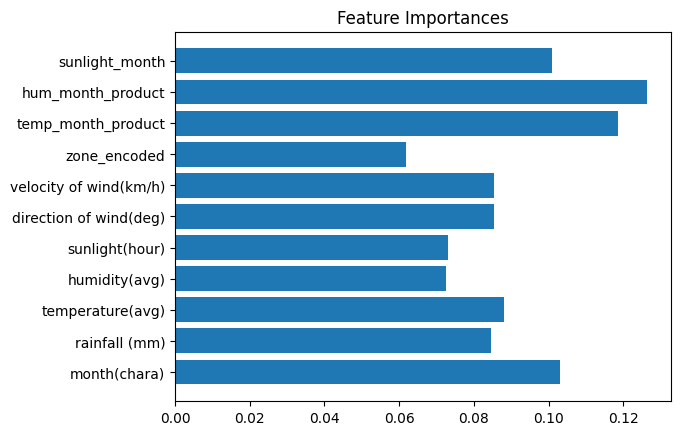

In [7]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_t, y_t)

importances = model.feature_importances_
features = X_t.columns

plt.barh(features, importances)
plt.title("Feature Importances")
plt.show()

In [8]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.7121951219512195